In [1]:
from utils import load_recs_as_user_item_matrix, load_gender_vector
import pandas as pd
from pycaret.classification import setup, create_model, tune_model, compare_models, predict_model, plot_model

# Retrieve Training and Test Data

In [2]:
X = load_recs_as_user_item_matrix()
Y = load_gender_vector()

In [3]:
# split into test and train/val
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(sss.split(X, Y))
X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]

# Create train/val dataframe
columns = [f'{i}' for i in range(len(X[1]))]
df = pd.DataFrame(X_train, columns=columns)
rec_data = df.assign(gender=y_train)
rec_data

,0,1,2,3,4,5,6,7,8,9,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,gender
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
674,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
# Create test dataframe
holdout_df = pd.DataFrame(X_test, columns=columns)
holdout_df = holdout_df.assign(gender=y_test)
holdout_df

,0,1,2,3,4,5,6,7,8,9,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,gender
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Setup Data and Compare Models

In [5]:
# setup data with seed 42 for reproducability and designated test set
s = setup(data=rec_data, target='gender', test_data=holdout_df,  session_id=42)

,Description,Value
0,Session id,42
1,Target,gender
2,Target type,Binary
3,Original data shape,"(845, 1575)"
4,Transformed data shape,"(1183, 1575)"
5,Transformed train set shape,"(845, 1575)"
6,Transformed test set shape,"(338, 1575)"
7,Numeric features,1574
8,Preprocess,True
9,Imputation type,simple


In [6]:
# Compare different models
best_model = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.3915,0.5317,0.8447,0.2918,0.4335,0.0405,0.0728,0.1420
qda,Quadratic Discriminant Analysis,0.2757,0.5000,1.0000,0.2757,0.4322,0.0000,0.0000,0.1550
svm,SVM - Linear Kernel,0.6426,0.0000,0.3683,0.3652,0.3603,0.1158,0.1179,0.1480
lda,Linear Discriminant Analysis,0.6343,0.5724,0.3688,0.3507,0.3569,0.1034,0.1039,0.1770
ridge,Ridge Classifier,0.6709,0.0000,0.3252,0.3928,0.3509,0.1341,0.1376,0.1540
lr,Logistic Regression,0.6862,0.5839,0.2312,0.3904,0.2873,0.1034,0.1107,0.7670
dt,Decision Tree Classifier,0.6154,0.5083,0.2699,0.2860,0.2756,0.0160,0.0159,0.1530
lightgbm,Light Gradient Boosting Machine,0.6806,0.5462,0.1929,0.3706,0.2442,0.0690,0.0784,0.1700
knn,K Neighbors Classifier,0.6758,0.5306,0.1723,0.3205,0.2218,0.0455,0.0470,0.1940
ada,Ada Boost Classifier,0.6841,0.5590,0.1504,0.3094,0.1995,0.0420,0.0416,0.1830


# Create LogReg Model

In [7]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7412,0.6311,0.2609,0.5455,0.3529,0.2156,0.2385
1,0.7176,0.5785,0.3913,0.4737,0.4286,0.2433,0.2453
2,0.7647,0.5997,0.3333,0.6667,0.4444,0.3156,0.3461
3,0.6824,0.5758,0.2500,0.4000,0.3077,0.1156,0.1210
4,0.6471,0.5321,0.2500,0.3333,0.2857,0.0576,0.0587
5,0.6667,0.6123,0.1304,0.2727,0.1765,-0.0009,-0.0009
6,0.6071,0.5617,0.0870,0.1429,0.1081,-0.1250,-0.1313
7,0.7024,0.5445,0.1739,0.4000,0.2424,0.0917,0.1040
8,0.6786,0.6066,0.2174,0.3571,0.2703,0.0795,0.0836


In [8]:
# hypertune the logreg model, optimize by F1 metric
tuned_lr = tune_model(lr, optimize = 'F1')
print(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6588,0.6417,0.5652,0.4062,0.4727,0.2304,0.2373
1,0.6118,0.5856,0.5652,0.3611,0.4407,0.1649,0.1747
2,0.6706,0.6168,0.5000,0.4286,0.4615,0.2263,0.2277
3,0.5882,0.5704,0.5000,0.3429,0.4068,0.1079,0.1125
4,0.5529,0.5499,0.4583,0.3056,0.3667,0.0421,0.0442
5,0.6071,0.6165,0.4348,0.3333,0.3774,0.0977,0.0995
6,0.6429,0.5588,0.5217,0.3871,0.4444,0.1897,0.1943
7,0.5833,0.5217,0.4348,0.3125,0.3636,0.0661,0.0681
8,0.6071,0.6101,0.5217,0.3529,0.4211,0.1402,0.1463


Fitting 10 folds for each of 10 candidates, totalling 100 fits
LogisticRegression(C=2.214, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


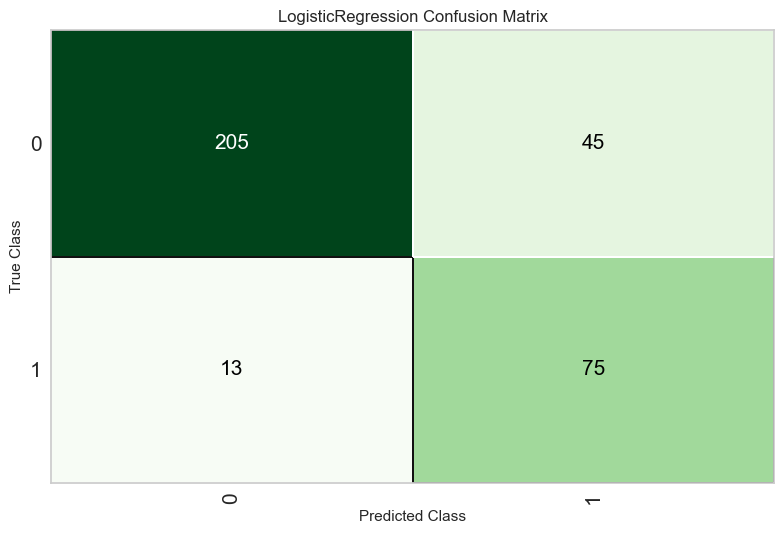

In [9]:
# plot training results in confusion matrix
plot_model(tuned_lr, plot = 'confusion_matrix')

# Create Naive Bayes Model

In [10]:
# train nb model
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4353,0.5582,0.8261,0.3016,0.4419,0.0752,0.1181
1,0.4353,0.5309,0.7391,0.2881,0.4146,0.0414,0.0595
2,0.4706,0.6059,0.9167,0.3385,0.4944,0.1395,0.2247
3,0.3647,0.5068,0.8333,0.2857,0.4255,0.0086,0.0161
4,0.4235,0.5857,0.9583,0.3239,0.4842,0.1076,0.2081
5,0.3333,0.4597,0.7391,0.2537,0.3778,-0.0505,-0.0894
6,0.3571,0.5438,0.9565,0.2933,0.4490,0.0514,0.1264
7,0.3333,0.4597,0.7391,0.2537,0.3778,-0.0505,-0.0894
8,0.3690,0.5249,0.8696,0.2857,0.4301,0.0305,0.0597


In [11]:
# hypertune the nb model, optimize by F1 metric
tuned_nb = tune_model(nb, optimize = 'F1')
print(tuned_nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4824,0.5929,0.7826,0.3158,0.4500,0.1048,0.1452
1,0.4588,0.5375,0.7391,0.2982,0.4250,0.0641,0.0888
2,0.5529,0.6646,0.7917,0.3654,0.5000,0.1852,0.2315
3,0.4588,0.5205,0.7917,0.3167,0.4524,0.0822,0.1181
4,0.4471,0.6332,0.8333,0.3175,0.4598,0.0860,0.1320
5,0.3690,0.4729,0.6522,0.2500,0.3614,-0.0570,-0.0844
6,0.4762,0.6151,0.8696,0.3279,0.4762,0.1304,0.1974
7,0.3571,0.4968,0.6957,0.2540,0.3721,-0.0485,-0.0771
8,0.4286,0.5923,0.8696,0.3077,0.4545,0.0841,0.1405


Fitting 10 folds for each of 10 candidates, totalling 100 fits
GaussianNB(priors=None, var_smoothing=0.009)


# Check Test Results for Original Recommendations

In [12]:
# retrieve the obfuscated data that corresponds to the test set as dataframe
# obfuscated = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs.tsv')
# obfuscated_test = obfuscated[test_index]
# obf_df = pd.DataFrame(obfuscated_test, columns=columns)
# obf_df = obf_df.assign(gender=y_test)

## Test Results for LR

In [13]:
# look at prediciton results for the original test data
pred_holdout = predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8284,0.9199,0.8523,0.6250,0.7212,0.6014,0.6165


In [14]:
# look at prediciton results for the obfuscated recommender list
# pred_obf = predict_model(tuned_lr, data = obf_df)

## Test Results for NB

In [15]:
# look at prediciton results for the original test data
pred_holdout_nb = predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5503,0.7265,0.9659,0.3632,0.5280,0.2406,0.3517


In [16]:
# look at prediciton results for the obfuscated recommender list
# pred_obf_nb = predict_model(tuned_nb, data = obf_df)

# Test LR on Obfuscated Data

## Gender w/ Random Removal & Random Insertion

### 0.2

In [17]:
gender_random_random_02 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender-random_i_random-addbehind_prop_0.2.tsv')
obfuscated_test = gender_random_random_02[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data = obf_df)
predict_model(tuned_nb, data = obf_df) # add this to all the following to predict for NB also.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8284,0.9241,0.7660,0.6667,0.7129,0.5913,0.5942


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5562,0.6798,0.7872,0.3627,0.4966,0.1871,0.2331


,0,1,2,3,4,5,6,7,8,9,...,1567,1568,1569,1570,1571,1572,1573,gender,prediction_label,prediction_score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.0


### 0.4

In [18]:
gender_random_random_04 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender-random_i_random-addbehind_prop_0.4.tsv')
obfuscated_test = gender_random_random_04[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8462,0.9165,0.5957,0.8000,0.6829,0.5842,0.5953


### 0.6

In [19]:
gender_random_random_06 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender-random_i_random-addbehind_prop_0.6.tsv')
obfuscated_test = gender_random_random_06[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7751,0.8518,0.3617,0.6800,0.4722,0.3459,0.3737


## Gender Removal & Random Insertion


### 0.2

In [20]:
gender_random_02 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender_i_random-addbehind_prop_0.2.tsv')
obfuscated_test = gender_random_02[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8284,0.9013,0.7447,0.6731,0.7071,0.5862,0.5877


### 0.4

In [21]:
gender_random_04 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender_i_random-addbehind_prop_0.4.tsv')
obfuscated_test = gender_random_04[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8757,0.9297,0.7872,0.7708,0.7789,0.6925,0.6926


### 0.6

In [22]:
gender_random_06 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender_i_random-addbehind_prop_0.6.tsv')
obfuscated_test = gender_random_06[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8521,0.9008,0.6170,0.8056,0.6988,0.6030,0.6124


## Random Removal & Random Inserion

### 0.2

In [23]:
random_random_02 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_random_i_random-addbehind_prop_0.2.tsv')
obfuscated_test = random_random_02[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7515,0.8279,0.7021,0.5410,0.6111,0.4330,0.4409


### 0.4

In [24]:
random_random_04 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_random_i_random-addbehind_prop_0.4.tsv')
obfuscated_test = random_random_04[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7396,0.7764,0.4894,0.5349,0.5111,0.3342,0.3348


### 0.6

In [25]:
random_random_06 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_random_i_random-addbehind_prop_0.6.tsv')
obfuscated_test = random_random_06[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7278,0.6802,0.3617,0.5152,0.4250,0.2538,0.2606


## Random Removal and Popularity Insertion

### 0.2

In [26]:
random_pop_02 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_random_i_popularity-addbehind_prop_0.2.tsv')
obfuscated_test = random_pop_02[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7870,0.7881,0.7234,0.5965,0.6538,0.5020,0.5069


### 0.4

In [27]:
random_pop_04 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_random_i_popularity-addbehind_prop_0.4.tsv')
obfuscated_test = random_pop_04[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7219,0.7323,0.5106,0.5000,0.5053,0.3119,0.3119


### 0.6

In [28]:
random_pop_06 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_random_i_popularity-addbehind_prop_0.6.tsv')
obfuscated_test = random_pop_06[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6036,0.5680,0.3404,0.3077,0.3232,0.0439,0.0440


## Gender w/ Random Removal and Popularity Insertion

### 0.2

In [29]:
gender_random_pop_02 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender-random_i_popularity-addbehind_prop_0.2.tsv')
obfuscated_test = gender_random_pop_02[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8343,0.9041,0.7872,0.6727,0.7255,0.6079,0.6117


### 0.4

In [30]:
gender_random_pop_04 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender-random_i_popularity-addbehind_prop_0.4.tsv')
obfuscated_test = gender_random_pop_04[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8225,0.8671,0.7021,0.6735,0.6875,0.5636,0.5638


### 0.6

In [31]:
gender_random_pop_06 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender-random_i_popularity-addbehind_prop_0.6.tsv')
obfuscated_test = gender_random_pop_06[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7633,0.7972,0.4681,0.5946,0.5238,0.3693,0.3740


## Gender Removal with Popularity Insertion


### 0.2

In [32]:
gender_pop_02 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender_i_popularity-addbehind_prop_0.2.tsv')
obfuscated_test = gender_pop_02[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8521,0.9219,0.8085,0.7037,0.7525,0.6477,0.6509


### 0.4

In [33]:
gender_pop_04 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender_i_popularity-addbehind_prop_0.4.tsv')
obfuscated_test = gender_pop_04[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8225,0.8696,0.7447,0.6604,0.7000,0.5746,0.5767


### 0.6

In [34]:
gender_pop_06 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_gender_i_popularity-addbehind_prop_0.6.tsv')
obfuscated_test = gender_pop_06[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_obf = predict_model(tuned_lr, data=obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8343,0.8696,0.6383,0.7317,0.6818,0.5705,0.5730


## kFN Obfuscation

### 0.2

In [17]:
kfn_02 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_kfn_i_kfn-addbehind_prop_0.2.tsv')
obfuscated_test = kfn_02[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_lr = predict_model(tuned_lr, data = obf_df)
pred_nb = predict_model(tuned_nb, data = obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7574,0.7918,0.6809,0.5517,0.6095,0.4363,0.4414


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5444,0.6379,0.7447,0.3500,0.4762,0.1574,0.1932


### 0.4

In [18]:
kfn_04 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_kfn_i_kfn-addbehind_prop_0.4.tsv')
obfuscated_test = kfn_04[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_lr = predict_model(tuned_lr, data = obf_df)
pred_nb = predict_model(tuned_nb, data = obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7101,0.7241,0.4468,0.4773,0.4615,0.2635,0.2637


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5444,0.6027,0.6170,0.3295,0.4296,0.1052,0.1197


### 0.6

In [19]:
kfn_06 = load_recs_as_user_item_matrix(file='obfuscated/obfuscated_recs_r_kfn_i_kfn-addbehind_prop_0.6.tsv')
obfuscated_test = kfn_06[test_index]
obf_df = pd.DataFrame(obfuscated_test, columns=columns)
obf_df = obf_df.assign(gender=y_test)
pred_lr = predict_model(tuned_lr, data = obf_df)
pred_nb = predict_model(tuned_nb, data = obf_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6864,0.6603,0.3191,0.4167,0.3614,0.1584,0.1609


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5562,0.5477,0.5106,0.3158,0.3902,0.0710,0.0760
